In [ ]:
#bismillahirrahmanirrahim
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
import re
import os
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
# Reading the data
data = pd.read_excel('/content/drive/MyDrive/Skripsi/Data hasil.xlsx')
data_copy = data
# Checking first 10 rows of data
data.head(10)

,URL User,URL Gambar,User,Tag,Tanggal,Hastag,Isi,Retweet,Like,Aplikasi,Label,Keterangan
0,https://x.com/tanyakanrl,https://pbs.twimg.com/profile_images/140623608...,Tanyarl,@tanyakanrl,Feb 17,kendaraan listrik,"tugas bikin ekosistem, maket rumah, makalah, s...",3.2K,44K,X,4,Sangat negatif
1,https://x.com/jokowi,https://pbs.twimg.com/profile_images/164676912...,Joko Widodo,@jokowi,Jul 7,kendaraan listrik,Dimulai dengan hadir pada Upacara peringatan H...,76,573,X,2,Netral
2,https://x.com/PartaiSocmed,https://pbs.twimg.com/profile_images/177910066...,#99,@PartaiSocmed,"Sep 19, 2022",kendaraan listrik,Dulu perusahaan kereta cepat China rugi gila2a...,1.5K,3.4K,X,1,Positif
3,https://x.com/PngAdilnR4kyt,https://pbs.twimg.com/profile_images/163178332...,Pengadilan Rakyat,@PngAdilnR4kyt,Jul 2,kendaraan listrik,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,361,525,X,4,Sangat negatif
4,https://x.com/antaranews,https://pbs.twimg.com/profile_images/119334534...,antaranews.com,@antaranews,"Nov 17, 2021",kendaraan listrik,Menko Marves sampaikan pengembangankendaraanli...,1,2,X,1,Positif
5,https://x.com/detikcom,https://pbs.twimg.com/profile_images/177759192...,detikcom,@detikcom,"Nov 15, 2021",kendaraan listrik,Beragam kendaraan listrik dipamerkan di Gaikin...,2,11,X,1,Positif
6,https://x.com/KompasTV,https://pbs.twimg.com/profile_images/143083004...,KOMPAS TV,@KompasTV,"Oct 25, 2021",kendaraan listrik,Luhut: MobilListrikHyundai Genesis G80 JadiKen...,7,NaN,X,0,Sangat Positif
7,https://x.com/CNNIndonesia,https://pbs.twimg.com/profile_images/669793728...,CNN Indonesia,@CNNIndonesia,"Nov 12, 2021",kendaraan listrik,FOTO: DeretanKendaraanListrikdi GIIAS 2021,NaN,NaN,X,1,Positif
8,https://x.com/PLNBabel,https://pbs.twimg.com/profile_images/128286024...,Info Listrik Babel,@PLNBabel,"Nov 15, 2021",kendaraan listrik,"Electrizen, PLN terus mendorong akselerasi ken...",2,NaN,X,1,Positif
9,https://x.com/liputan6dotcom,https://pbs.twimg.com/profile_images/170623680...,LIPUTAN6,@liputan6dotcom,"Nov 15, 2021",kendaraan listrik,PLN Gunakan 264 MotorListrikuntukKendaraanOper...,NaN,NaN,X,0,Sangat Positif


# **Data Preprocessing**

In [ ]:
# Replace 'data' with 'data' in the drop function
data.drop(['URL User', 'URL Gambar', 'User', 'Tag', 'Tanggal', 'Hastag', 'Retweet', 'Like', 'Aplikasi'], axis=1, inplace=True, errors='ignore')
data

,Isi,Label,Keterangan
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif
...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif


**Cleaning (Case folding)**

In [ ]:
# case folding

def clean_text(text):
  # Check if text is a string before applying re.sub
  if isinstance(text, str):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
  else:
    # Handle non-string values (e.g., NaN) by returning an empty string
    return ''

data['cleaned_text'] = data['Isi'].apply(lambda x: clean_text(x))
data.head()

,Isi,Label,Keterangan,cleaned_text
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...


**Filtering (Stopwords Removal)**

In [ ]:
!pip install nltk
import nltk # Import the nltk library

nltk.download('stopwords')
from nltk.corpus import stopwords

all_stopwords = stopwords.words('indonesian')
all_stopwords.remove('tidak')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing the URl

def rem_url(cleaned_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',cleaned_text)

# Removing the stepwords 'indonesian'

def rem_stopwords(cleaned_text):
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in (stopwords.words('indonesian'))])
    return cleaned_text

# Removing the html

def rem_html(cleaned_text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',cleaned_text)

def remove_at_mentions(cleaned_text):
    return re.sub(r'@\w+', '', cleaned_text)


# Removing emojis by codes

def rem_emoji(cleaned_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', cleaned_text)

# Fixing the cleaned_text

def fixing(cleaned_text):
    cleaned_text = re.sub(r"jembut", " buruk", cleaned_text)
    return cleaned_text

# Seperate alphabets

def sep_alphabets(cleaned_text):
    words = cleaned_text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)


def review_to_words(review):
    letters_only = re.sub("[^a-zA-Z]", " ",review)
    words = letters_only.lower().split()
    stops = set(stopwords.words("indonesian"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

data['filtered_text'] = data['cleaned_text']

data['filtered_text'] = data['filtered_text'].astype(str).apply(remove_at_mentions)
data['filtered_text'] = data['filtered_text'].apply(lambda x : rem_url(x))
data['filtered_text'] = data['filtered_text'].apply(lambda x : rem_stopwords(x))
data['filtered_text'] = data['filtered_text'].apply(lambda x : rem_html(x))
data['filtered_text'] = data['filtered_text'].apply(lambda x : rem_emoji(x))
data['filtered_text'] = data['filtered_text'].apply(lambda x : sep_alphabets(x))
data['filtered_text'] = data['filtered_text'].apply(lambda x : review_to_words(x))
data['filtered_text'] = data['filtered_text'].astype(str).replace("bodoh", "buruk", regex=True)


# result

data['filtered_text']

,filtered_text
0,tugas bikin ekosistem maket rumah makalah scra...
1,hadir upacara peringatan bhayangkara meresmika...
2,perusahaan kereta cepat china rugi gila an ind...
3,investor kabur raksasa produsen baterai evkend...
4,menko marves pengembangankendaraanlistrikpenti...
...,...
5167,chargeran kyak gtu cm sekian luasnya indonesia...
5168,gak tau bu kos karna otw beli mobilnya
5169,kalo bnyakan mobil listrik yg charger antri dr...
5170,mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
filtered_text = stopwords.words('indonesian')
data['filtered_text'] = data['filtered_text']
data.head()

,Isi,Label,Keterangan,cleaned_text,filtered_text
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...


**Tokenizing**

In [ ]:
# tokenizing

def tokenize_text(text):
  tokenized_text = text.split()
  return tokenized_text
data['tokens'] = data['filtered_text'].apply(lambda x: tokenize_text(x))
data.head()

,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"[tugas, bikin, ekosistem, maket, rumah, makala..."
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"[hadir, upacara, peringatan, bhayangkara, mere..."
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"[perusahaan, kereta, cepat, china, rugi, gila,..."
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"[investor, kabur, raksasa, produsen, baterai, ..."
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"[menko, marves, pengembangankendaraanlistrikpe..."


**Stemmed**

In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer Bahasa Indonesia
stemmer = StemmerFactory().create_stemmer()

# Fungsi Lemmatisasi (Stemming) untuk Bahasa Indonesia
def stem_text(token_list):
    return " ".join([stemmer.stem(token) for token in token_list])

# Menerapkan Stemming pada DataFrame
data['stemmed_review'] = data['tokens'].apply(lambda x: stem_text(x))
data.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"[tugas, bikin, ekosistem, maket, rumah, makala...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"[hadir, upacara, peringatan, bhayangkara, mere...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"[perusahaan, kereta, cepat, china, rugi, gila,...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"[investor, kabur, raksasa, produsen, baterai, ...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"[menko, marves, pengembangankendaraanlistrikpe...",menko marves pengembangankendaraanlistrikpenti...


In [ ]:
from IPython.display import display
display(data)

,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"[tugas, bikin, ekosistem, maket, rumah, makala...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"[hadir, upacara, peringatan, bhayangkara, mere...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"[perusahaan, kereta, cepat, china, rugi, gila,...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"[investor, kabur, raksasa, produsen, baterai, ...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"[menko, marves, pengembangankendaraanlistrikpe...",menko marves pengembangankendaraanlistrikpenti...
...,...,...,...,...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif,chargeran kyak gtu cm diantara sekian luasny...,chargeran kyak gtu cm sekian luasnya indonesia...,"[chargeran, kyak, gtu, cm, sekian, luasnya, in...",chargeran kyak gtu cm sekian luas indonesia kc...
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif,gak tau bu kos karna aku baru mau otw beli mob...,gak tau bu kos karna otw beli mobilnya,"[gak, tau, bu, kos, karna, otw, beli, mobilnya]",gak tau bu kos karna otw beli mobil
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif,kalo bnyakan mobil listrik yg mau charger bisa...,kalo bnyakan mobil listrik yg charger antri dr...,"[kalo, bnyakan, mobil, listrik, yg, charger, a...",kalo bnyakan mobil listrik yg charger antri dr...
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif,mobil listrik kek ny lebih ribet deh soal ny k...,mobil listrik kek ny ribet deh ny klo nge char...,"[mobil, listrik, kek, ny, ribet, deh, ny, klo,...",mobil listrik kek ny ribet deh ny klo nge char...


**Hasil Dataset Preprocessing**

In [ ]:
display(data[['Label', 'Keterangan', 'stemmed_review']])

,Label,Keterangan,stemmed_review
0,4,Sangat negatif,tugas bikin ekosistem maket rumah makalah scra...
1,2,Netral,hadir upacara ingat bhayangkara resmi ekosiste...
2,1,Positif,usaha kereta cepat china rugi gila an indonesi...
3,4,Sangat negatif,investor kabur raksasa produsen baterai evkend...
4,1,Positif,menko marves pengembangankendaraanlistrikpenti...
...,...,...,...
5167,0,Sangat Positif,chargeran kyak gtu cm sekian luas indonesia kc...
5168,3,Negatif,gak tau bu kos karna otw beli mobil
5169,4,Sangat negatif,kalo bnyakan mobil listrik yg charger antri dr...
5170,3,Negatif,mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
data.to_csv("preprocessingKendaraanListrik.csv", index = False) # Replace 'my_data' with 'data'

In [ ]:
# Baca file CSV menjadi DataFrame
data = pd.read_csv('preprocessingKendaraanListrik.csv')

# Tampilkan DataFrame sebelum penghapusan
print("DataFrame Sebelum Penghapusan:")
display(data)

DataFrame Sebelum Penghapusan:


,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"['tugas', 'bikin', 'ekosistem', 'maket', 'ruma...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"['hadir', 'upacara', 'peringatan', 'bhayangkar...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"['perusahaan', 'kereta', 'cepat', 'china', 'ru...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"['investor', 'kabur', 'raksasa', 'produsen', '...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"['menko', 'marves', 'pengembangankendaraanlist...",menko marves pengembangankendaraanlistrikpenti...
...,...,...,...,...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif,chargeran kyak gtu cm diantara sekian luasny...,chargeran kyak gtu cm sekian luasnya indonesia...,"['chargeran', 'kyak', 'gtu', 'cm', 'sekian', '...",chargeran kyak gtu cm sekian luas indonesia kc...
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif,gak tau bu kos karna aku baru mau otw beli mob...,gak tau bu kos karna otw beli mobilnya,"['gak', 'tau', 'bu', 'kos', 'karna', 'otw', 'b...",gak tau bu kos karna otw beli mobil
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif,kalo bnyakan mobil listrik yg mau charger bisa...,kalo bnyakan mobil listrik yg charger antri dr...,"['kalo', 'bnyakan', 'mobil', 'listrik', 'yg', ...",kalo bnyakan mobil listrik yg charger antri dr...
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif,mobil listrik kek ny lebih ribet deh soal ny k...,mobil listrik kek ny ribet deh ny klo nge char...,"['mobil', 'listrik', 'kek', 'ny', 'ribet', 'de...",mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
# Baca file CSV menjadi DataFrame
data = pd.read_csv('preprocessingKendaraanListrik.csv')

# Hapus baris dengan nilai kosong
data_cleaned = data.dropna()

# Tampilkan DataFrame setelah penghapusan
print("\nDataFrame Setelah Penghapusan:")
display(data)

# Simpan DataFrame setelah penghapusan ke file CSV baru (opsional)
data_cleaned.to_csv('preprocessingKendaraanListrik.csv', index=False)


DataFrame Setelah Penghapusan:


,Isi,Label,Keterangan,cleaned_text,filtered_text,tokens,stemmed_review
0,"tugas bikin ekosistem, maket rumah, makalah, s...",4,Sangat negatif,tugas bikin ekosistem maket rumah makalah s...,tugas bikin ekosistem maket rumah makalah scra...,"['tugas', 'bikin', 'ekosistem', 'maket', 'ruma...",tugas bikin ekosistem maket rumah makalah scra...
1,Dimulai dengan hadir pada Upacara peringatan H...,2,Netral,dimulai dengan hadir pada upacara peringatan h...,hadir upacara peringatan bhayangkara meresmika...,"['hadir', 'upacara', 'peringatan', 'bhayangkar...",hadir upacara ingat bhayangkara resmi ekosiste...
2,Dulu perusahaan kereta cepat China rugi gila2a...,1,Positif,dulu perusahaan kereta cepat china rugi gila a...,perusahaan kereta cepat china rugi gila an ind...,"['perusahaan', 'kereta', 'cepat', 'china', 'ru...",usaha kereta cepat china rugi gila an indonesi...
3,INVESTOR KABUR LAGI....\n\n2 RAKSASA PRODUSEN ...,4,Sangat negatif,investor kabur lagi raksasa produsen ba...,investor kabur raksasa produsen baterai evkend...,"['investor', 'kabur', 'raksasa', 'produsen', '...",investor kabur raksasa produsen baterai evkend...
4,Menko Marves sampaikan pengembangankendaraanli...,1,Positif,menko marves sampaikan pengembangankendaraanli...,menko marves pengembangankendaraanlistrikpenti...,"['menko', 'marves', 'pengembangankendaraanlist...",menko marves pengembangankendaraanlistrikpenti...
...,...,...,...,...,...,...,...
5167,chargeran kyak gtu cm 1 diantara sekian luasny...,0,Sangat Positif,chargeran kyak gtu cm diantara sekian luasny...,chargeran kyak gtu cm sekian luasnya indonesia...,"['chargeran', 'kyak', 'gtu', 'cm', 'sekian', '...",chargeran kyak gtu cm sekian luas indonesia kc...
5168,gak tau bu kos karna aku baru mau otw beli mob...,3,Negatif,gak tau bu kos karna aku baru mau otw beli mob...,gak tau bu kos karna otw beli mobilnya,"['gak', 'tau', 'bu', 'kos', 'karna', 'otw', 'b...",gak tau bu kos karna otw beli mobil
5169,kalo bnyakan mobil listrik yg mau charger bisa...,4,Sangat negatif,kalo bnyakan mobil listrik yg mau charger bisa...,kalo bnyakan mobil listrik yg charger antri dr...,"['kalo', 'bnyakan', 'mobil', 'listrik', 'yg', ...",kalo bnyakan mobil listrik yg charger antri dr...
5170,"mobil listrik kek ny lebih ribet deh,soal ny K...",3,Negatif,mobil listrik kek ny lebih ribet deh soal ny k...,mobil listrik kek ny ribet deh ny klo nge char...,"['mobil', 'listrik', 'kek', 'ny', 'ribet', 'de...",mobil listrik kek ny ribet deh ny klo nge char...


In [ ]:
#Checking number of null values

data.isna().sum()

,0
Isi,1
Label,0
Keterangan,0
cleaned_text,1
filtered_text,15
tokens,0
stemmed_review,15


**Exploratory Data Analysis (EDA)**

adalah proses awal dalam analisis data yang bertujuan untuk memahami isi, struktur, dan pola dalam data sebelum dilakukan pemodelan atau analisis lanjutan.

In [ ]:
print(f"Input data has {len(data)} rows and {len(data.columns)} columns")
print(f"Sangat Positif 0 = {len(data[data['Label']==0])} rows")
print(f"Positif 1 = {len(data[data['Label']==1])} rows")
print(f"Netral 2 = {len(data[data['Label']==2])} rows")
print(f"Negatif 3 = {len(data[data['Label']==3])} rows")
print(f"Sangat Negatif 4 = {len(data[data['Label']==4])} rows")

Input data has 5172 rows and 7 columns
Sangat Positif 0 = 895 rows
Positif 1 = 515 rows
Netral 2 = 663 rows
Negatif 3 = 1470 rows
Sangat Negatif 4 = 1629 rows


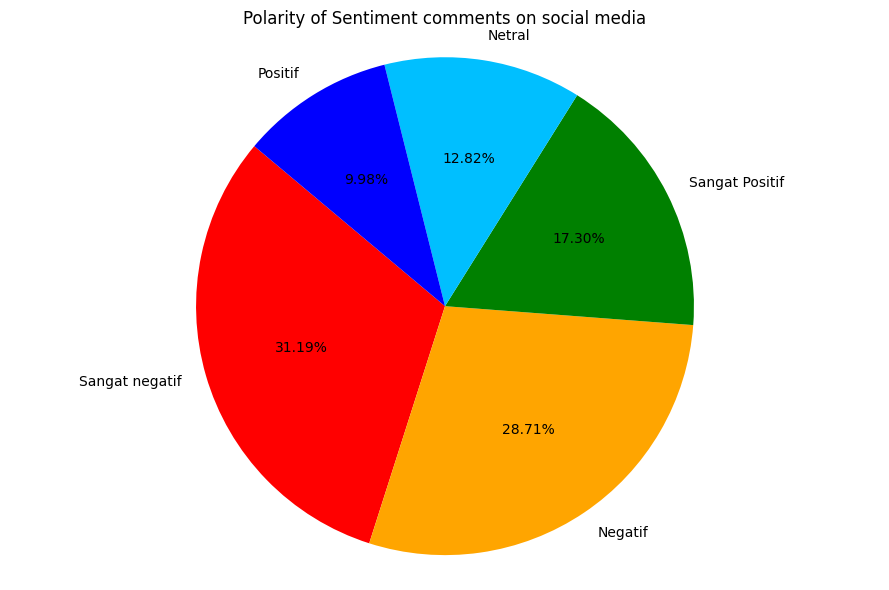

In [ ]:
# Hitung jumlah data per label
label_counts = data['Keterangan'].value_counts()  # Changed 'ens_learn' to 'data'
labels = label_counts.index
sizes = label_counts.values
colors = ['red', 'orange', 'green', 'deepskyblue', 'blue']  # warna untuk 5 label

# Pie chart
plt.figure(figsize=(9, 6))
plt.pie(sizes, labels=labels, autopct='%2.2f%%', colors=colors, startangle=140)
plt.title('Polarity of Sentiment comments on social media')
plt.axis('equal')  # Agar pie chart berbentuk bulat
plt.tight_layout()
plt.show()

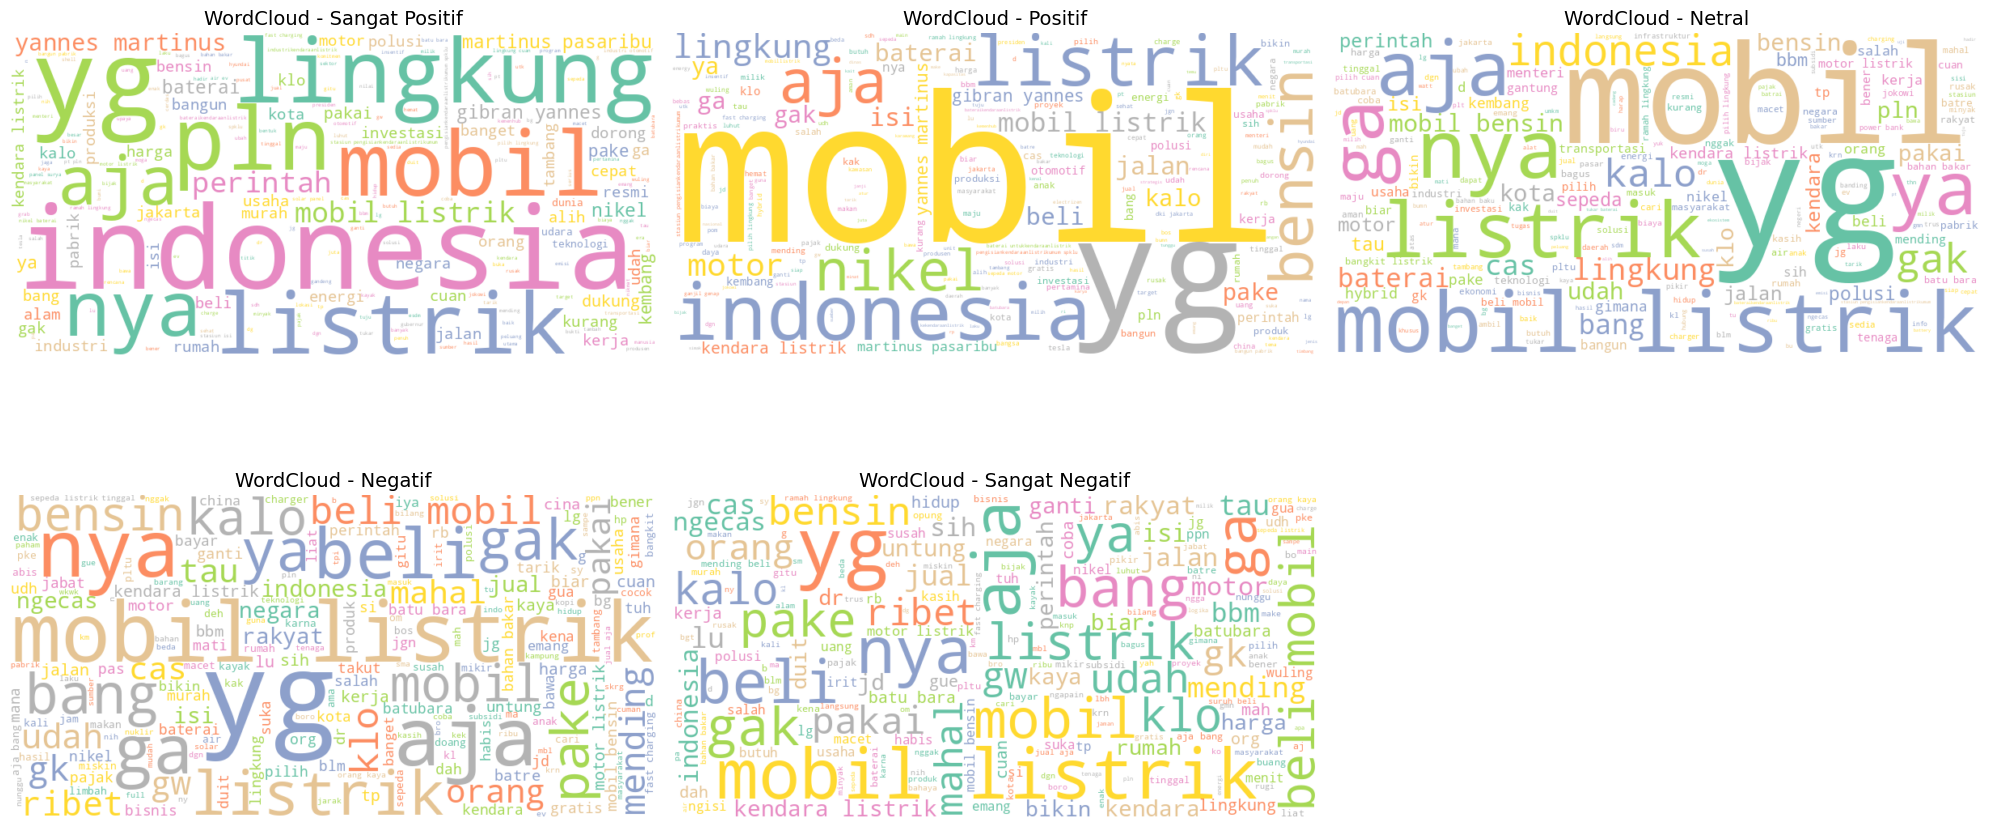

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Misalnya kamu sudah punya data preprocessed dengan kolom 'Text' dan 'Label'
# data = pd.read_csv('data_preprocessed.csv')

# Mapping label angka ke teks (opsional, biar WordCloud-nya jelas)
label_names = {
    0: 'Sangat Positif',
    1: 'Positif',
    2: 'Netral',
    3: 'Negatif',
    4: 'Sangat Negatif'
}

# Buat WordCloud untuk masing-masing label
plt.figure(figsize=(20, 10))
for label in range(5):
    # Ambil semua teks dengan label tertentu
    texts = data[data['Label'] == label]['stemmed_review']

    # Gabungkan semua teks jadi satu string besar
    combined_text = ' '.join(texts.astype(str))

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(combined_text)

    # Plot
    plt.subplot(2, 3, label + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {label_names[label]}', fontsize=14)

plt.tight_layout()
plt.show()


# **Data Preparation**

bertujuan untuk melakukan preprocessing data teks dan menyiapkan data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import random
import tensorflow as tf

# Convert 'stemmed_review' column to string type, handling potential NaN values
data['stemmed_review'] = data['stemmed_review'].astype(str)

total_data = data['stemmed_review'].tolist()
labels = data['Label'].tolist()

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

tokenizer = Tokenizer(num_words=10000, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
X_seq = tokenizer.texts_to_sequences(total_data)
X_seq = pad_sequences(X_seq, maxlen=100)

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(total_data).toarray()

Y = to_categorical(labels_encoded)

seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)


**Splitting**

Membagi data untuk menggunakan 80% untuk pelatihan dan 20% untuk testing.

In [ ]:
X_seq_train, X_seq_test, X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_seq, X_tfidf, labels_encoded, test_size=0.2, random_state=seed_value)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter # Import Counter for label distribution analysis

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Assuming X_seq_train is your padded training data
# Oversampling dengan SMOTE using X_seq_train instead of X_train_padded
X_resampled, y_resampled = smote.fit_resample(X_seq_train, y_train)

# Cek distribusi label setelah SMOTE
print(f"Distribusi label sebelum SMOTE: {Counter(y_train)}")
print(f"Distribusi label setelah SMOTE: {Counter(y_resampled)}")

Distribusi label sebelum SMOTE: Counter({np.int64(4): 1320, np.int64(3): 1169, np.int64(0): 701, np.int64(2): 537, np.int64(1): 410})
Distribusi label setelah SMOTE: Counter({np.int64(4): 1320, np.int64(3): 1320, np.int64(1): 1320, np.int64(2): 1320, np.int64(0): 1320})


**One-Hot Encoding**

Untuk merepresentasikan kata-kata atau token dalam bentuk numerik agar bisa diproses oleh jaringan neural. Karena LSTM hanya bisa memproses angka, bukan teks mentah, maka kita perlu cara untuk mengubah teks ke dalam bentuk vektor (embedding) angka

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

unique_labels_train = np.unique(labels_encoded)
print("Label yang ada dalam data pelatihan:", unique_labels_train)

print("Label train one-hot encoded:\n", y_train)
print("\nLabel test one-hot encoded:\n", y_test)

Label yang ada dalam data pelatihan: [0 1 2 3 4]
Label train one-hot encoded:
 [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

Label test one-hot encoded:
 [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


Menampilkan skor TF-IDF dari setiap kata dalam dokumen tertentu (berdasarkan indeks), dan mencetaknya dalam urutan skor tertinggi ke terendah.

In [ ]:
from scipy.sparse import csr_matrix
feature_names = tfidf_vectorizer.get_feature_names_out()
def print_tfidf_scores(doc_index):
    # Pastikan bahwa X_tfidf diakses dengan benar untuk baris spesifik
    doc_vector = X_tfidf[doc_index]

    # Mengkonversi baris matriks sparse ke format array 1D
    if isinstance(doc_vector, csr_matrix):
        doc_vector = doc_vector.toarray().flatten()  # Menggunakan .flatten() untuk mengubahnya menjadi 1D array

    # Membuat DataFrame dari array, dengan feature_names sebagai indeks
    data_tfidf = pd.DataFrame(doc_vector, index=feature_names, columns=["TF-IDF"])

    # Menyaring hanya nilai TF-IDF yang lebih besar dari 0
    data_tfidf = data_tfidf[data_tfidf["TF-IDF"] > 0]

    # Mengurutkan nilai TF-IDF dari yang tertinggi ke terendah
    data_tfidf = data_tfidf.sort_values(by="TF-IDF", ascending=False)

    # Cetak hasilnya
    print(f"Dokumen ke-{doc_index}:")
    if total_data and len(total_data) > doc_index:
        print(total_data[doc_index])
    else:
        print("Data dokumen tidak tersedia atau indeks di luar jangkauan.")
    print("\nTF-IDF Scores:")
    print(data_tfidf)

# Contoh pemanggilan fungsi
print_tfidf_scores(84)


Dokumen ke-84:
kendaraanberpeluang kembang kawasan aseanlistrik

TF-IDF Scores:
                       TF-IDF
aseanlistrik         0.579260
kendaraanberpeluang  0.579260
kawasan              0.462091
kembang              0.339687


**Training LSTM**

In [ ]:
print(X_tfidf_train.shape)  # Pastikan hasilnya (jumlah_data, 1296)
print(X_tfidf_test.shape)   # Pastikan hasilnya (jumlah_data, 1296)


(4137, 7242)
(1035, 7242)


In [ ]:
# Assuming 'total_data' is your list of text documents and 'labels_encoded' are your labels
from sklearn.model_selection import train_test_split

# Perform the train-test split on the original data
train_texts, test_texts, y_train, y_test = train_test_split(
    total_data, labels_encoded, test_size=0.2, random_state=42
)

# Now you can proceed with TF-IDF vectorization
vectorizer = TfidfVectorizer()  # Inisialisasi
X_tfidf_train = vectorizer.fit_transform(train_texts)  # Fit hanya pada train
X_tfidf_test = vectorizer.transform(test_texts)  # Transform test pakai vectorizer yang sudah fit

In [ ]:
from tensorflow.keras.layers import Input  # Import the Input layer

num_tfidf_features = X_tfidf_train.shape[1]  # Ambil fitur hanya dari train
tfidf_input = Input(shape=(num_tfidf_features,), name='tfidf_input') # Now Input is defined and can be used

In [ ]:
print("Train TF-IDF shape:", X_tfidf_train.shape)
print("Test TF-IDF shape:", X_tfidf_test.shape)

Train TF-IDF shape: (4137, 6333)
Test TF-IDF shape: (1035, 6333)


Membangun model klasifikasi teks dengan menggabungkan dua jenis representasi data

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical


# Inisialisasi dan fit vectorizer hanya pada train
vectorizer = TfidfVectorizer()
X_tfidf_train = vectorizer.fit_transform(train_texts)  # Gunakan fit_transform hanya di train
X_tfidf_test = vectorizer.transform(test_texts)  # Gunakan transform di test agar dimensinya sama

# Dapatkan jumlah fitur dari train
num_tfidf_features = X_tfidf_train.shape[1]

# Define max_seq_length before using it
max_seq_length = 100  # You might need to adjust this value based on your data

# Definisi input model
sequence_input = Input(shape=(max_seq_length,), name='sequence_input')
tfidf_input = Input(shape=(num_tfidf_features,), name='tfidf_input')

# Gabungkan input jika perlu
merged = concatenate([sequence_input, tfidf_input])

# Define num_classes before using it in to_categorical
num_classes = 5  # Set to 5 for your 5 sentiment classes

# One-hot encode y_train and y_test
y_train = to_categorical(y_train, num_classes=num_classes)  # num_classes is 5 in your case
y_test = to_categorical(y_test, num_classes=num_classes)


# Definisi output
output = Dense(num_classes, activation='softmax')(merged)

# Buat model
model = Model(inputs=[sequence_input, tfidf_input], outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Cetak model summary
model.summary()

# Pastikan input train dan test memiliki bentuk yang sama
print("Train TF-IDF shape:", X_tfidf_train.shape)
print("Test TF-IDF shape:", X_tfidf_test.shape)

# Latih model
history = model.fit([X_seq_train, X_tfidf_train.toarray()], y_train,
                    epochs=100, batch_size=229,
                    validation_data=([X_seq_test, X_tfidf_test.toarray()], y_test))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence_input      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tfidf_input         │ (None, 6333)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 6433)      │          0 │ sequence_input[0… │
│ (Concatenate)       │                   │            │ tfidf_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 5)         │     32,170 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 32,170 (125.66 KB)

 Trainable params: 32,170 (125.66 KB)

 Non-trainable params: 0 (0.00 B)

Train TF-IDF shape: (4137, 6333)
Test TF-IDF shape: (1035, 6333)
Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.2255 - loss: 64.9316 - val_accuracy: 0.2512 - val_loss: 28.5084
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.2521 - loss: 20.6549 - val_accuracy: 0.2300 - val_loss: 8.3119
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2669 - loss: 6.7068 - val_accuracy: 0.2599 - val_loss: 5.7940
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2647 - loss: 4.7912 - val_accuracy: 0.2908 - val_loss: 4.4110
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2699 - loss: 4.1392 - val_accuracy: 0.2821 - val_loss: 4.0364
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2702 - loss: 3.4545 - val_accuracy: 0.2812 - val_loss: 3.7810
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2806 - loss: 3.1665 - val_accuracy: 0.2821 - val_loss: 4.1483
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━

In [ ]:
loss, accuracy = model.evaluate([X_seq_test, X_tfidf_test], y_test)  # Assuming one-hot encoded labels

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3639 - loss: 3.1171
Test Loss: 4.025562286376953
Test Accuracy: 0.36328503489494324


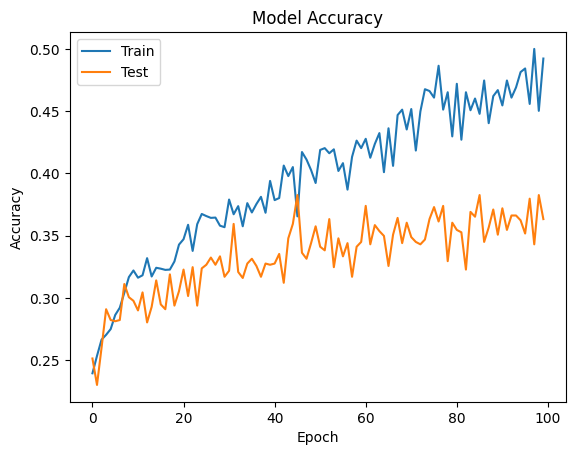

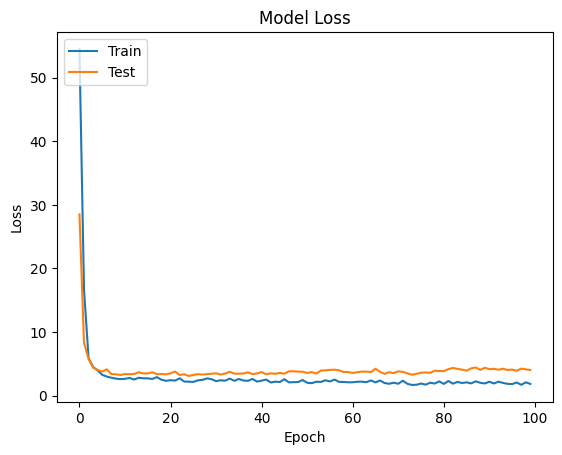

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Evaluasi Confusion Matrix**

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


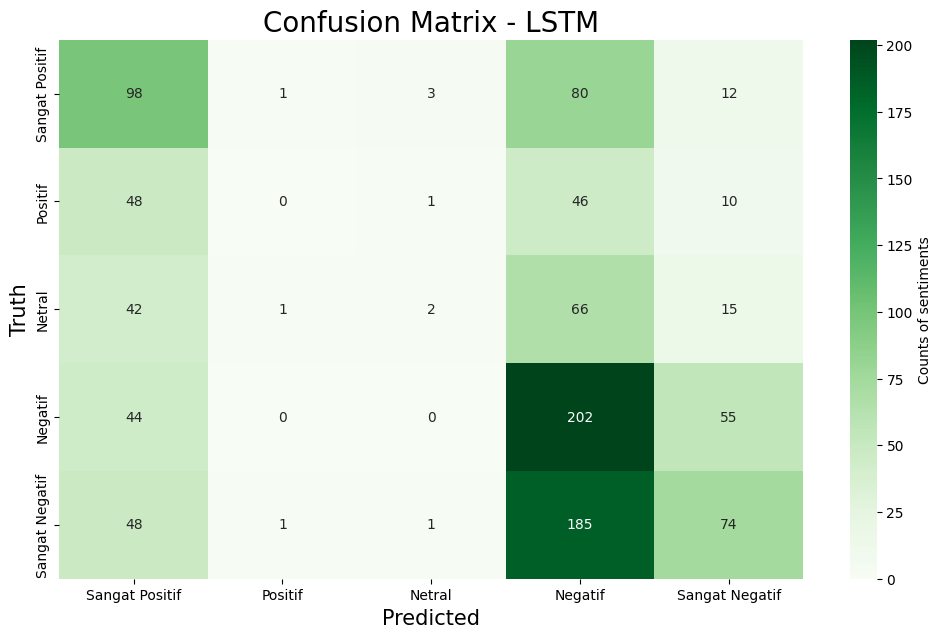

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities using the model
pred_probs = model.predict([X_seq_test, X_tfidf_test.toarray()]) #This line was added

# Misal pred_probs = model.predict(X_test), hasil prediksi dari LSTM (probabilitas)
# Ambil label prediksi (kelas dengan nilai tertinggi)
flat_prediction = np.argmax(pred_probs, axis=1)

# Jika y_test masih dalam bentuk one-hot encoding, ubah ke label
flat_true_labels = np.argmax(y_test, axis=1)

# Hitung confusion matrix
cm_hasil = confusion_matrix(flat_true_labels, flat_prediction)

# Visualisasi
plt.figure(figsize=(12, 7))
sentiment_classes = ['Sangat Positif', 'Positif', 'Netral', 'Negatif', 'Sangat Negatif']
sb.heatmap(cm_hasil, cmap=plt.cm.Greens, annot=True, cbar_kws={'label': 'Counts of sentiments'}, fmt='d',
           xticklabels=sentiment_classes,
           yticklabels=sentiment_classes)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)
plt.title('Confusion Matrix - LSTM', fontsize=20)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# evaluasi model
test_loss, test_acc = model.evaluate([X_seq_test, X_tfidf_test], y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.3f}")

# prediksi
predictions = model.predict([X_seq_test, X_tfidf_test])
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)


# laporan
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3639 - loss: 3.1171
Test Accuracy: 0.363
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.51      0.41       194
           1       0.00      0.00      0.00       105
           2       0.29      0.02      0.03       126
           3       0.35      0.67      0.46       301
           4       0.45      0.24      0.31       309

    accuracy                           0.36      1035
   macro avg       0.29      0.29      0.24      1035
weighted avg       0.33      0.36      0.31      1035

